# <u>BRITISH AIRWAYS PROJECT</u>  
## OBJECTIVE:
Develop a Classification Model To Predict Customers Who Successfully Book Flights From Those Who Cancel.

### IMPORTING PACKAGES

In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Predictive Modelling
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve
from xgboost import XGBClassifier

### EXPLORATORY DATA ANALYSIS

In [2]:
#Importing Dataset
df0 = pd.read_excel("6.0 customer_booking.xlsx")

#EDA
#Primary EDA
print('''DATA EXPLORATION
Dataset Shape: {}
Dataset Size: {}
\nDATA SUMMARY'''.
format(df0.shape, 
       df0.size))

df0.info()

#Generating count pre and post drop of missing values 
print('\nPre-Drop Count Of Missing Values\n{}'.
      format(df0.isna().sum()))

df0.dropna(inplace=True, axis=0)

print('\nPost-Drop Count Of Missing Values\n{}'.
      format(df0.isna().sum()))

#Generating preview of dataset
print('\nDATASET PREVIEW')
df0.head(5)

DATA EXPLORATION
Dataset Shape: (50000, 14)
Dataset Size: 700000

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       5000

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
#Droping columns
df = df0.drop(columns=['sales_channel','trip_type','flight_day', 'route','booking_origin'])

#EDA
print("DATA EXPLORATION \nDataset Shape: {} \nDataset Size: {} \n\nDATA SUMMARY".
      format(df0.shape, df0.size))

#Generating summary of data
df.info()

#Generating preview of data
df.head()

DATA EXPLORATION 
Dataset Shape: (50000, 14) 
Dataset Size: 700000 

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   wants_extra_baggage    50000 non-null  int64  
 5   wants_preferred_seat   50000 non-null  int64  
 6   wants_in_flight_meals  50000 non-null  int64  
 7   flight_duration        50000 non-null  float64
 8   booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.4 MB


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


### DATA VISUALIZATION

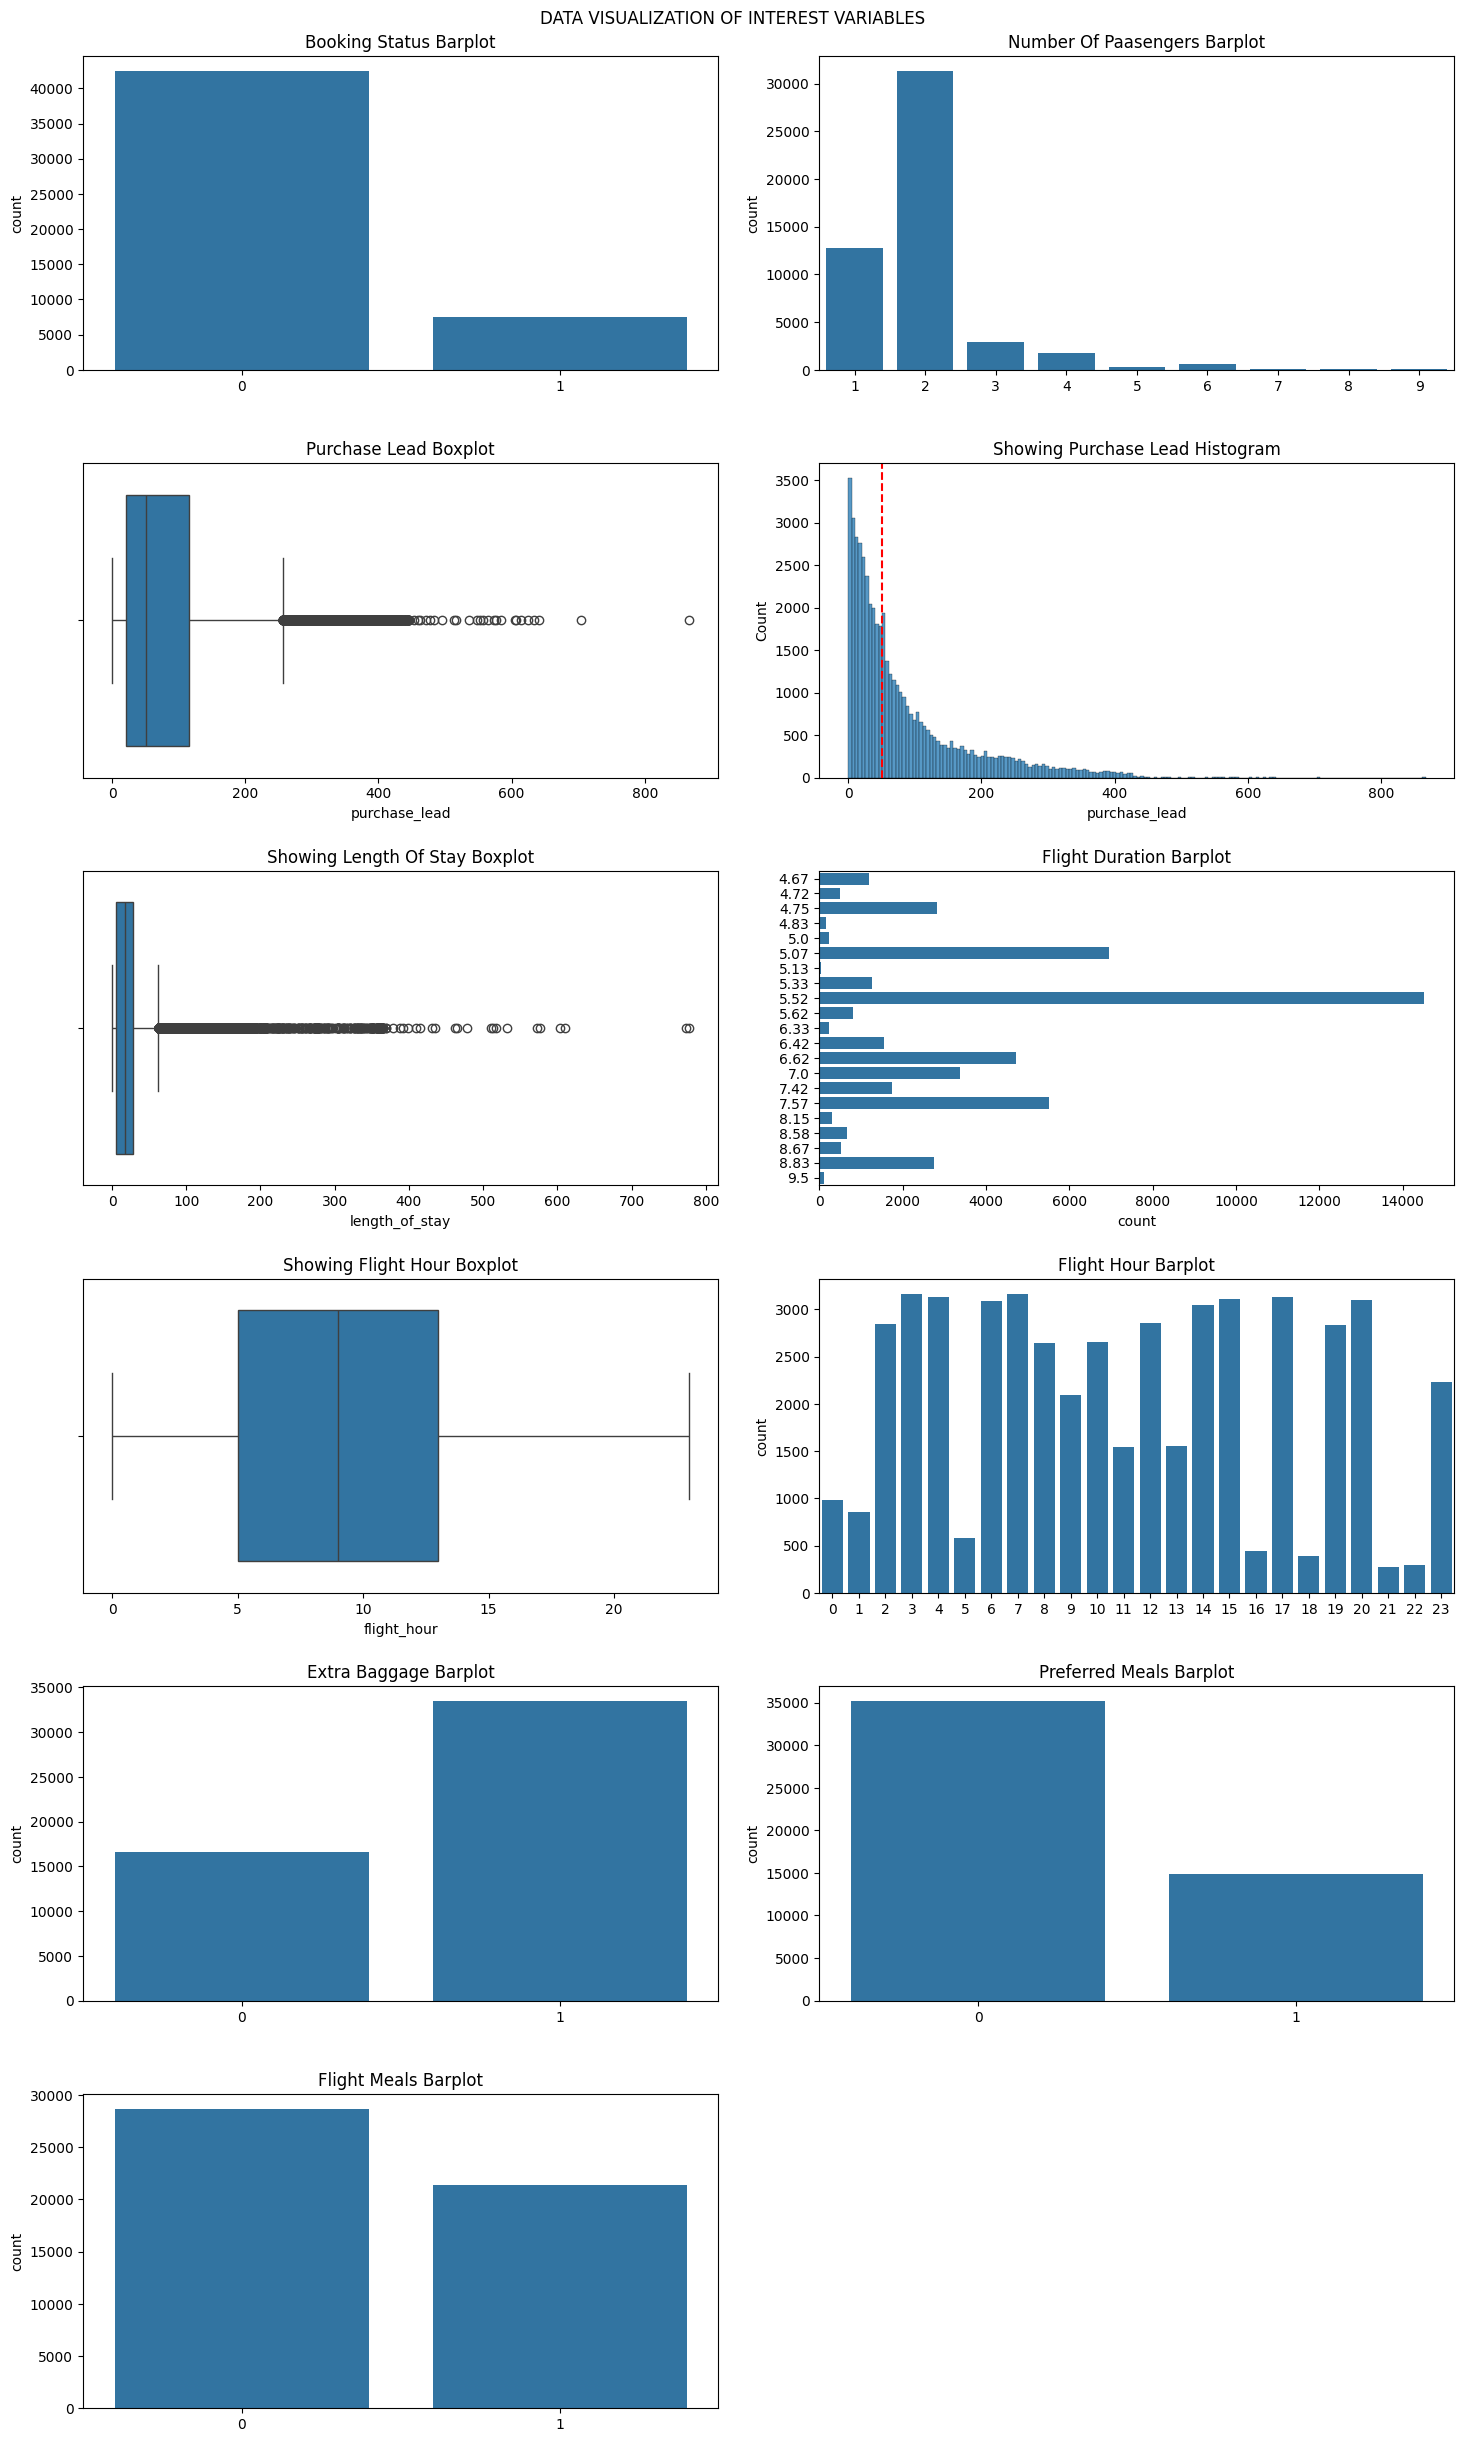

In [4]:
#Generating subplots
fig, ax = plt.subplots(6,2,figsize=(15,25))
plt.suptitle("DATA VISUALIZATION OF INTEREST VARIABLES")

#Generating vusializations
sns.barplot(x=df["booking_complete"].unique(),y=df["booking_complete"].value_counts() ,ax=ax[0,0])
sns.barplot(x=df["num_passengers"].unique(), y=df["num_passengers"].value_counts(), ax=ax[0,1])
sns.boxplot(x=df["purchase_lead"], ax=ax[1,0]) 
sns.histplot(x=df["purchase_lead"], ax=ax[1,1]) 
sns.boxplot(x=df["length_of_stay"], ax=ax[2,0])
sns.barplot(y=df["flight_duration"].unique(), x=df["flight_duration"].value_counts(), orient='h',ax=ax[2,1])
sns.boxplot(x=df["flight_hour"], ax=ax[3,0]) 
sns.barplot(x=df["flight_hour"].unique(), y=df["flight_hour"].value_counts(), ax=ax[3,1])
sns.barplot(x=df["wants_extra_baggage"].unique(), y=df["wants_extra_baggage"].value_counts(), ax=ax[4,0]) 
sns.barplot(x=df["wants_preferred_seat"].unique(), y=df["wants_preferred_seat"].value_counts(), ax=ax[4,1])
sns.barplot(x=df["wants_in_flight_meals"].unique(), y=df["wants_in_flight_meals"].value_counts(), ax=ax[5,0]) 
ax[5,1].axis('off')

#Labeling median values in histgram visualizations
ax[1,1].axvline(df["purchase_lead"].median(), color='red', linestyle='--')

#Labeling visualizations
ax[0,0].set_title("Booking Status Barplot")
ax[0,1].set_title("Number Of Paasengers Barplot")
ax[1,0].set_title("Purchase Lead Boxplot")
ax[1,1].set_title("Showing Purchase Lead Histogram")
ax[2,0].set_title("Showing Length Of Stay Boxplot")
ax[2,1].set_title("Flight Duration Barplot")
ax[3,0].set_title("Showing Flight Hour Boxplot")
ax[3,1].set_title("Flight Hour Barplot")
ax[4,0].set_title("Extra Baggage Barplot")
ax[4,1].set_title("Preferred Meals Barplot")
ax[5,0].set_title("Flight Meals Barplot")
plt.tight_layout(pad=2)

### MODEL PREP

In [5]:
#Checking class balance in booking complete
df.booking_complete.value_counts(normalize=True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

In [6]:
#Seperating dataset into X and y labels
y = df.booking_complete
X = df.drop('booking_complete', axis=1)

#Defining training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      stratify=y, 
                                                      test_size=0.20, 
                                                      random_state=42)

#Generating dataframe for split
split2 = pd.DataFrame(data={"Dimensions":[X_train.shape, 
                                          X_test.shape,
                                          y_train.size, 
                                          y_test.size]}, 
                      index=["X Train", "X Test", "Y Train", "Y Test"])

#Previewing split
split2

,Dimensions
X Train,"(40000, 8)"
X Test,"(10000, 8)"
Y Train,40000
Y Test,10000


In [7]:
#Checking class balance in y train
y_train.value_counts(normalize=True)

booking_complete
0    0.85045
1    0.14955
Name: proportion, dtype: float64

In [8]:
#Applying smote
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

booking_complete
0    34018
1    34018
Name: count, dtype: int64

In [9]:
# Initialize empty lists to store results
Model = []
Accuracy = []
Precision = []
F1 = []
Recall = []
ROC_AUC = []

# Generating function to store and display results
def resultify(name_or_results, test=None, pred=None):
    """
    Processes results if test and pred are provided, 
    or displays results if passed with no additional arguments.
    """
    
    # If called with no test/pred arguments, display the results DataFrame
    if test is None and pred is None:
        return pd.DataFrame(
            data={'Accuracy': Accuracy,
                  'Precision': Precision,
                  'Recall': Recall,
                  'F1': F1,
                  'ROC AUC': ROC_AUC},
            index=Model
        )
    
    # Ensure all required arguments are provided for result processing
    if not (test is None or pred is None):
        # Generate evaluation scores
        accuracy_value = round(accuracy_score(test, pred) * 100, 0)
        precision_value = round(precision_score(test, pred) * 100, 0)
        recall_value = round(recall_score(test, pred) * 100, 0)
        f1_value = round(f1_score(test, pred) * 100, 0)
        roc_auc_value = round(roc_auc_score(test, pred) * 100, 0)
        
        # Append values to lists
        Model.append(name_or_results)
        Accuracy.append(f"{accuracy_value}%")
        Precision.append(f"{precision_value}%")
        Recall.append(f"{recall_value}%")
        F1.append(f"{f1_value}%")
        ROC_AUC.append(f"{roc_auc_value}%")

### INITIALIZING CLASSIFIERS 

In [10]:
#Initializing first base classifier
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

#Initializing second base classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

#Initializing third base classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train, y_train)

print("CLASSIFIERS READY")

CLASSIFIERS READY


### PREDICTIONS

In [11]:
#Generating predictions
rfc_pred = rfc.predict(X_test)
resultify("RANDOM FOREST", y_test, rfc_pred) #Applying resultify

#Generating predictions
gbc_pred = gbc.predict(X_test)
resultify("GRADIENT BOOSTING", y_test, gbc_pred) #Applying resultify

#Generating predictions
xgb_pred = xgb.predict(X_test)
resultify("X GRADIENT BOOSTING", y_test, xgb_pred) #Applying resultify

### MODELS' RESULTS

In [12]:
#Displaying results
resultify('results')

,Accuracy,Precision,Recall,F1,ROC AUC
RANDOM FOREST,77.0%,23.0%,21.0%,22.0%,54.0%
GRADIENT BOOSTING,79.0%,25.0%,22.0%,24.0%,55.0%
X GRADIENT BOOSTING,79.0%,23.0%,18.0%,20.0%,54.0%


### CONFUSION MATRICES

In [13]:
#Defining validation confusion matricies 
rfc_val_cm = confusion_matrix(y_test, rfc_pred, normalize="all")*100
gbc_val_cm = confusion_matrix(y_test, gbc_pred, normalize="all")*100
xgb_val_cm = confusion_matrix(y_test, xgb_pred, normalize="all")*100

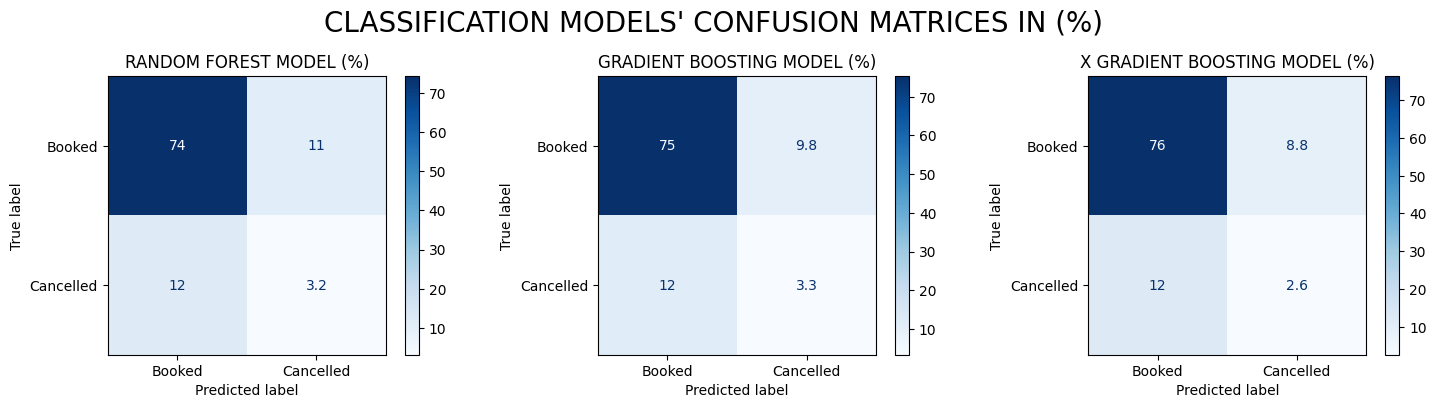

In [14]:
#Generating subplots
fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)

#Generating visualizations
ConfusionMatrixDisplay(confusion_matrix=rfc_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix=gbc_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix=xgb_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[2])

#Labelling subplots
ax[0].set_title("RANDOM FOREST MODEL (%)")
ax[1].set_title("GRADIENT BOOSTING MODEL (%)")
ax[2].set_title("X GRADIENT BOOSTING MODEL (%)")
plt.tight_layout(pad=1.5)

### ROC-AUC AND CALIBRATION CURVE

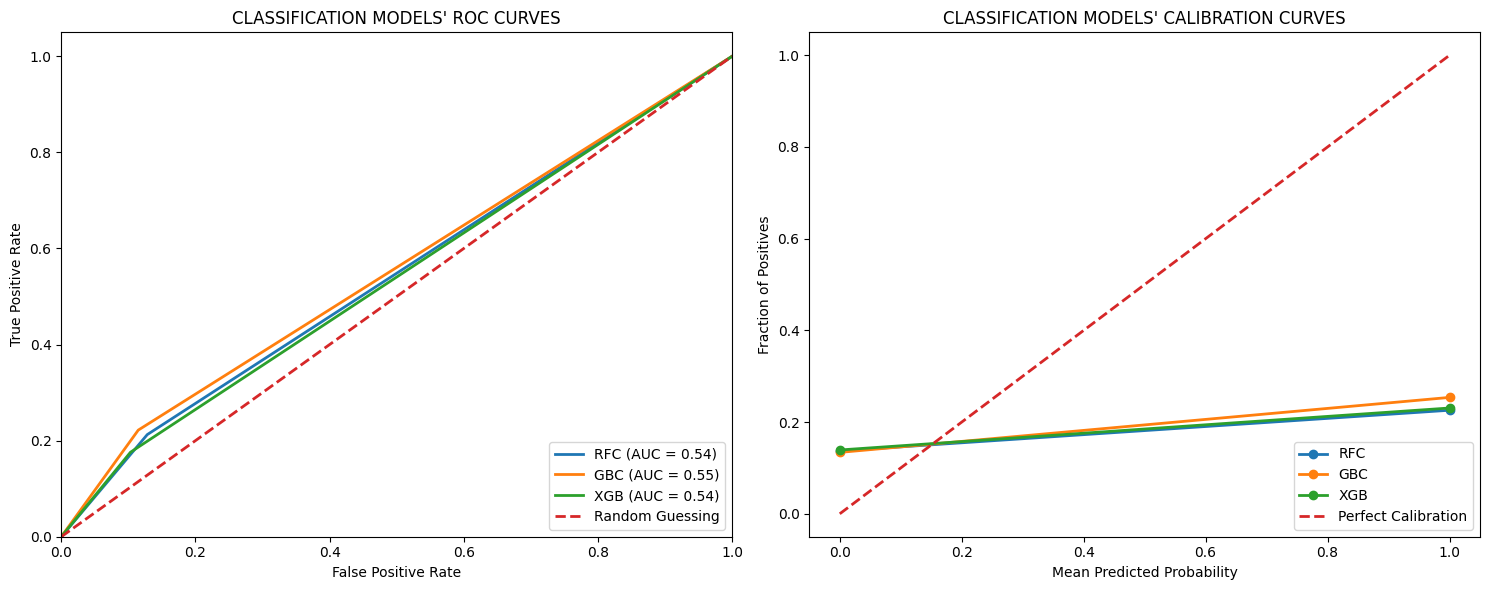

In [15]:
# ROC-AUC for Model 1
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# ROC-AUC for Model 2
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_pred)
gbc_roc_auc = auc(gbc_fpr, gbc_tpr)

# ROC-AUC for Model 3
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Calibration Curve for Model 1
rfc_prob_true, rfc_prob_pred = calibration_curve(y_test, rfc_pred, n_bins=10)

# Calibration Curve for Model 2
gbc_prob_true, gbc_prob_pred = calibration_curve(y_test, gbc_pred, n_bins=10)

# Calibration Curve for Model 3
xgb_prob_true, xgb_prob_pred = calibration_curve(y_test, xgb_pred, n_bins=10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC-AUC Plot for all models
axes[0].plot(rfc_fpr, rfc_tpr, lw=2, label='RFC (AUC = %0.2f)' % rfc_roc_auc)
axes[0].plot(gbc_fpr, gbc_tpr, lw=2, label='GBC (AUC = %0.2f)' % gbc_roc_auc)
axes[0].plot(xgb_fpr, xgb_tpr, lw=2, label='XGB (AUC = %0.2f)' % xgb_roc_auc)
axes[0].plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random Guessing')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title("CLASSIFICATION MODELS' ROC CURVES")
axes[0].legend(loc="lower right")

# Calibration Curve Plot for all models
axes[1].plot(rfc_prob_pred, rfc_prob_true, marker='o', linewidth=2, label='RFC')
axes[1].plot(gbc_prob_pred, gbc_prob_true, marker='o', linewidth=2, label='GBC')
axes[1].plot(xgb_prob_pred, xgb_prob_true, marker='o', linewidth=2, label='XGB')
axes[1].plot([0, 1], [0, 1],lw=2, linestyle='--', label='Perfect Calibration')
axes[1].set_xlabel('Mean Predicted Probability')
axes[1].set_ylabel('Fraction of Positives')
axes[1].set_title("CLASSIFICATION MODELS' CALIBRATION CURVES")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [16]:
#Generating rfc feature importances
rfc_importances = rfc.feature_importances_
rfc_indices = np.argsort(rfc_importances)[::-1]

#Generating dataframe for feature importances
rfc_df = pd.DataFrame(
    data={'Feature': [X.columns[i] for i in rfc_indices],
          'Importance': rfc_importances[rfc_indices]})

#Generating gbc feature importances
gbc_importances = gbc.feature_importances_
gbc_indices = np.argsort(gbc_importances)[::-1]

#Generating dataframe for feature importances
gbc_df = pd.DataFrame(
    data={'Feature': [X.columns[i] for i in gbc_indices],
          'Importance': gbc_importances[gbc_indices]})

#Generating xgb feature importances
xgb_importances = xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

#Generating dataframe for feature importances
xgb_df = pd.DataFrame(
    data={'Feature': [X.columns[i] for i in xgb_indices],
          'Importance': xgb_importances[xgb_indices]})

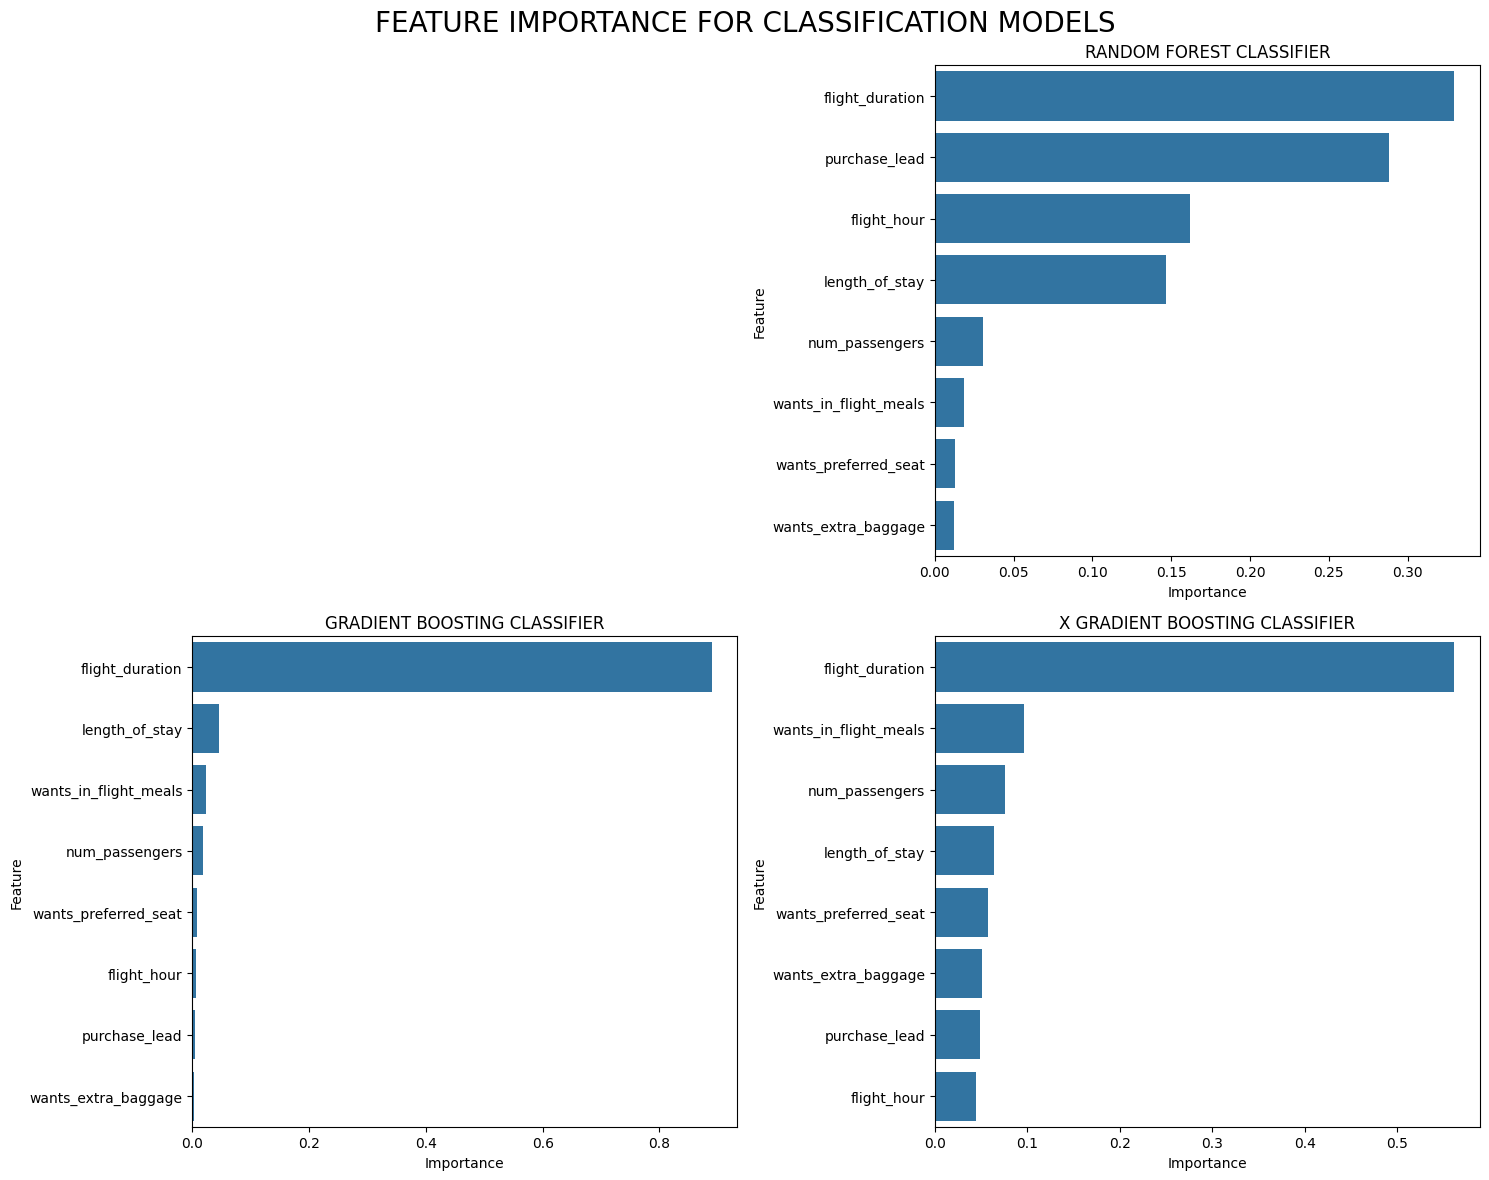

In [17]:
#Generating subplots
fig, ax = plt.subplots(2,2, figsize=(15,12))
plt.suptitle("FEATURE IMPORTANCE FOR CLASSIFICATION MODELS", fontsize=20)

#Disabling axis
ax[0,0].axis('off')

#Generating vusializations
sns.barplot(data=rfc_df, y='Feature', x='Importance', ax=ax[0,1]) #orient='h'
sns.barplot(data=gbc_df, y='Feature', x='Importance', ax=ax[1,0])
sns.barplot(data=xgb_df, y='Feature', x='Importance', ax=ax[1,1])

#Naming subplots
ax[0,1].set_title("RANDOM FOREST CLASSIFIER")
ax[1,0].set_title("GRADIENT BOOSTING CLASSIFIER")
ax[1,1].set_title("X GRADIENT BOOSTING CLASSIFIER")
plt.tight_layout()